# NN
In this section we'll try to apply a NN to our data, first Input layer + 70+50+30+2

In [3]:
%run -i utils.py
%run -i nn_utils.py

In [15]:
ecg = pd.read_csv("../DATA/ECG_NEW_noscaled.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")
#ecg = pd.read_csv("../DATA/ECG.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")
train_ecg_df, test_ecg_df = train_test_split(ecg, test_size=0.2, stratify=ecg['Label'], random_state=123)


train_ecg_df, val_ecg_df = train_test_split(train_ecg_df, test_size=0.25, stratify=train_ecg_df['Label'], random_state=123) # 0.25 x 0.8 = 0.2

num_train_ecg_Simo   = sum(train_ecg_df['Label'] == 0)
num_train_ecg_Luci   = sum(train_ecg_df['Label'] == 1)
num_train_ecg_Linda  = sum(train_ecg_df['Label'] == 2)
num_train_ecg_Marghe = sum(train_ecg_df['Label'] == 3)

num_test_ecg_Luci   = sum(test_ecg_df['Label'] == 1)
num_test_ecg_Simo   = sum(test_ecg_df['Label'] == 0)
num_test_ecg_Linda  = sum(test_ecg_df['Label'] == 2)
num_test_ecg_Marghe = sum(test_ecg_df['Label'] == 3)

num_val_ecg_Luci   = sum(val_ecg_df['Label'] == 1)
num_val_ecg_Simo   = sum(val_ecg_df['Label'] == 0)
num_val_ecg_Linda  = sum(val_ecg_df['Label'] == 2)
num_val_ecg_Marghe = sum(val_ecg_df['Label'] == 3)

## TRAIN SET
print('TRAIN SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_train_ecg_Simo, 100 * num_train_ecg_Simo / len(train_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_train_ecg_Luci, 100 * num_train_ecg_Luci / len(train_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_train_ecg_Linda, 100 * num_train_ecg_Linda / len(train_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_train_ecg_Luci, 100 * num_train_ecg_Luci / len(train_ecg_df)))

## TEST SET
print('test SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_test_ecg_Simo, 100 * num_test_ecg_Simo / len(test_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_test_ecg_Luci, 100 * num_test_ecg_Luci / len(test_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_test_ecg_Linda, 100 * num_test_ecg_Linda / len(test_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_test_ecg_Marghe, 100 * num_test_ecg_Marghe / len(test_ecg_df)))

# Val set
print('val SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_val_ecg_Simo, 100 * num_val_ecg_Simo / len(val_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_val_ecg_Luci, 100 * num_val_ecg_Luci / len(val_ecg_df)))


print('\tLinda ECG: {} ({:.2f}%)'.format(num_val_ecg_Linda, 100 * num_val_ecg_Linda / len(val_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_val_ecg_Marghe, 100 * num_val_ecg_Marghe / len(val_ecg_df)))



ecg_mat_train, label_ecg_train = create_array(train_ecg_df) 
ecg_mat_test, label_ecg_test   = create_array(test_ecg_df) 
ecg_mat_val, label_ecg_val   = create_array(val_ecg_df) 

TRAIN SET ECG
	Simo ECG: 1369 (20.40%)
	Luci ECG: 1919 (28.59%)
	Linda ECG: 2041 (30.41%)
	Marghe ECG: 1919 (28.59%)
test SET ECG
	Simo ECG: 457 (20.43%)
	Luci ECG: 640 (28.61%)
	Linda ECG: 680 (30.40%)
	Marghe ECG: 460 (20.56%)
val SET ECG
	Simo ECG: 457 (20.43%)
	Luci ECG: 639 (28.57%)
	Linda ECG: 680 (30.40%)
	Marghe ECG: 461 (20.61%)


The output for the model will be a four-element vector containing the probability of a given samples to be a person.

In [18]:
label_ecg_train = tf.keras.utils.to_categorical(label_ecg_train)
label_ecg_test  = tf.keras.utils.to_categorical(label_ecg_test)
label_ecg_val  = tf.keras.utils.to_categorical(label_ecg_val)
ecg_mat_train = ecg_mat_train.reshape( ecg_mat_train.shape[0], ecg_mat_train.shape[1],1)
ecg_mat_test = ecg_mat_test.reshape( ecg_mat_test.shape[0], ecg_mat_test.shape[1],1)

ecg_mat_val = ecg_mat_val.reshape( ecg_mat_val.shape[0], ecg_mat_val.shape[1],1)

# GRID SEARCH

In [21]:
def create_model1(drop,optimizer,activation='relu',size=5,poolsize=2):
# create model
    X_input = tf.keras.Input((ecg_mat_train.shape[1],1))
    X = tf.keras.layers.Conv1D(8, size)(X_input)
    X = tf.keras.layers.BatchNormalization(axis=2)(X)
    X = tf.keras.layers.Activation(activation)(X)
    
    X = tf.keras.layers.MaxPool1D(pool_size=poolsize)(X)
    X = tf.keras.layers.Dropout(drop)(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(10)(X)
    X = tf.keras.layers.Activation(activation)(X)
    X = tf.keras.layers.Dense(4)(X)
    X = tf.keras.layers.Activation('softmax')(X)

    model = tf.keras.Model(inputs = X_input, outputs = X, name='MyModel')
    
    
    return model

In [26]:
optimizer =Adam(learning_rate=0.0001)
model= create_model1(poolsize=5,drop=0.5,activation='relu',optimizer=optimizer,size=5)
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
num_epochs = 60
n_batch_size = 64
train_steps = int(np.ceil(len(ecg_mat_train)/n_batch_size))
val_steps = int(np.ceil(len(label_ecg_val)/n_batch_size))
hystory = model.fit(ecg_mat_train, label_ecg_train,epochs=num_epochs, 
                    steps_per_epoch=train_steps, validation_data=(ecg_mat_val, label_ecg_val), batch_size=n_batch_size,verbose=0)

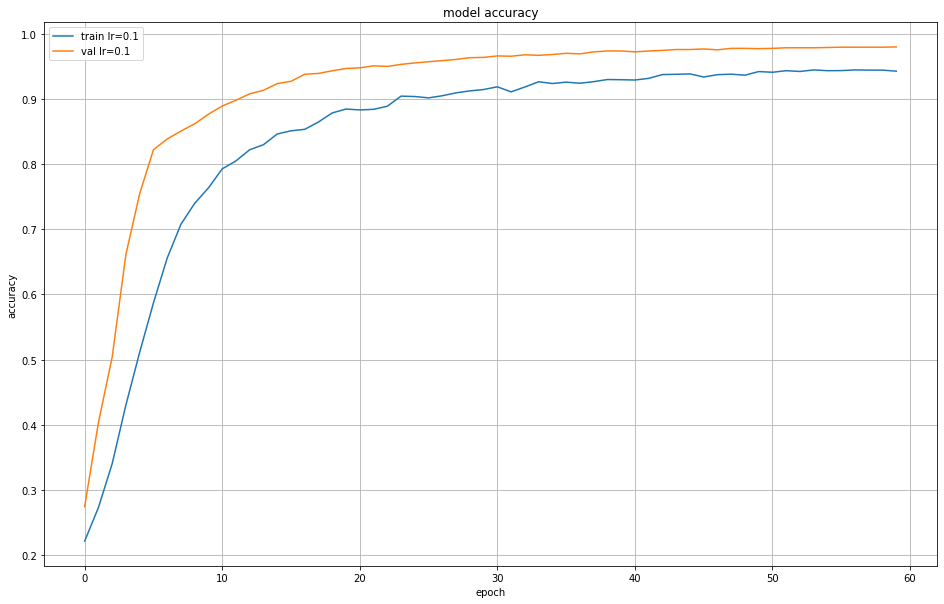

In [27]:
plt.figure(figsize=(16,10))
plt.plot(hystory.history['accuracy'])
plt.plot(hystory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train lr=0.1', 'val lr=0.1'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
num_epochs = 60
n_batch_size = 64
drop = [0.1,0.2,0.3,0.4,0.5,0.6]
size = [2,4,8,10,16]
optimizer =Adam(learning_rate=0.0001)
accuracy_vet1 = [] 
for drop_ in drop:
    
    accuracy_kernel = []
    for kernel in size:
        print(f"drop: {drop_}, kernel: {kernel}")
        model= create_model1(poolsize=5,drop=drop_,activation='relu',optimizer=optimizer,size=kernel)
        model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
        train_steps = int(np.ceil(len(ecg_mat_train)/n_batch_size))
        val_steps = int(np.ceil(len(label_ecg_test)/n_batch_size))
        model.fit(ecg_mat_train, label_ecg_train,epochs=num_epochs, 
                            steps_per_epoch=train_steps, validation_data=(ecg_mat_val, label_ecg_val), batch_size=n_batch_size,verbose=0)

        
        _, accuracy = model.evaluate(ecg_mat_test, label_ecg_test, batch_size=n_batch_size, verbose=0)
        
        accuracy_kernel.append(accuracy)
    accuracy_vet1.append(accuracy_kernel)
    

drop: 0.1, kernel: 2
drop: 0.1, kernel: 4
drop: 0.1, kernel: 8
drop: 0.1, kernel: 10
drop: 0.1, kernel: 16
drop: 0.2, kernel: 2
drop: 0.2, kernel: 4
drop: 0.2, kernel: 8
drop: 0.2, kernel: 10
drop: 0.2, kernel: 16
drop: 0.3, kernel: 2
drop: 0.3, kernel: 4
drop: 0.3, kernel: 8
drop: 0.3, kernel: 10
drop: 0.3, kernel: 16
drop: 0.4, kernel: 2
drop: 0.4, kernel: 4
drop: 0.4, kernel: 8


In [ ]:
import seaborn as sns
size = ["2","4","8","10","16"]
commands = ["0.1","0.2","0.3","0.4","0.5","0.6"]
            
plt.figure(figsize=(13, 10))
sns.heatmap(accuracy_vet1,
            xticklabels=size,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Dropout')
plt.ylabel('kernel size')
plt.show()

# Grid search 2

In [ ]:
def create_model2(drop,optimizer,activation='relu',size=5,poolsize=2):

    X_input = tf.keras.Input((ecg_mat_train.shape[1],1))
    
    X = tf.keras.layers.Conv1D(8, size)(X_input)
    X = tf.keras.layers.BatchNormalization(axis=2)(X)
    X = tf.keras.layers.Activation(activation)(X)
    
    
    X = tf.keras.layers.Conv1D(8, size)(X_input)
    X = tf.keras.layers.BatchNormalization(axis=2)(X)
    X = tf.keras.layers.Activation(activation)(X)
    
    X = tf.keras.layers.MaxPool1D(pool_size=poolsize)(X)
    X = tf.keras.layers.Dropout(drop)(X)
    
    X = tf.keras.layers.Flatten()(X)
    
    X = tf.keras.layers.Dense(10)(X)
    X = tf.keras.layers.Activation(activation)(X)
    
    X = tf.keras.layers.Dense(4)(X)
    X = tf.keras.layers.Activation('softmax')(X)

    model = tf.keras.Model(inputs = X_input, outputs = X)
    
    
    return model

In [ ]:
num_epochs = 60
n_batch_size = 64
drop = [0.1,0.2,0.3,0.4,0.5,0.6]
size = [2,4,8,10,16]
optimizer =Adam(learning_rate=0.0001)
accuracy_vet2 = [] 
for drop_ in drop:
    
    accuracy_kernel = []
    for kernel in size:
        print(f"drop: {drop_}, kernel: {kernel}")
        model= create_model2(poolsize=5,drop=drop_,activation='relu',optimizer=optimizer,size=kernel)
        model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
        train_steps = int(np.ceil(len(ecg_mat_train)/n_batch_size))
        val_steps = int(np.ceil(len(label_ecg_test)/n_batch_size))
        model.fit(ecg_mat_train, label_ecg_train,epochs=num_epochs, 
                            steps_per_epoch=train_steps, validation_data=(ecg_mat_val, label_ecg_val), batch_size=n_batch_size,verbose=0)

        
        _, accuracy = model.evaluate(ecg_mat_test, label_ecg_test, batch_size=n_batch_size, verbose=0)
        
        accuracy_kernel.append(accuracy)
    accuracy_vet2.append(accuracy_kernel)

In [ ]:
size = ["2","4","8","10","16"]
commands = ["0.1","0.2","0.3","0.4","0.5","0.6"]

plt.figure(figsize=(13, 10))
sns.heatmap(accuracy_vet,
           xticklabels=size,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Dropout')
plt.ylabel('kernel size')
plt.show()

# Experiments

In [ ]:
model1lr01 = Sequential()

model1lr01.add(Conv1D(filters=8, kernel_size=5, activation='relu', input_shape=(ecg_mat_train.shape[1],1)))
#model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model1lr01.add(MaxPooling1D(pool_size=2))
model1lr01.add(Dropout(0.5))

model1lr01.add(Flatten())
model1lr01.add(Dense(10, activation='relu'))
model1lr01.add(Dense(4, activation='softmax'))
#optimizer =Adam(learning_rate=0.01)
model1lr01.compile(loss='mse', optimizer="adam", metrics=['accuracy'])

In [46]:
model1lr01.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 96, 8)             48        
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 48, 8)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 48, 8)             0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                3850      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 44        
Total params: 3,942
Trainable params: 3,942
Non-trainable params: 0
____________________________________________________

In [47]:
num_epochs = 60
n_batch_size = 64
train_steps = int(np.ceil(len(ecg_mat_train)/n_batch_size))
val_steps = int(np.ceil(len(label_ecg_test)/n_batch_size))
hystory = model1lr01.fit(ecg_mat_train, label_ecg_train,epochs=num_epochs, 
                    steps_per_epoch=train_steps, validation_data=(ecg_mat_test, label_ecg_test), batch_size=n_batch_size)

Epoch 1/60
140/140 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.7775 - val_loss: 0.0211 - val_accuracy: 0.9481
Epoch 2/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9533 - val_loss: 0.0079 - val_accuracy: 0.9835
Epoch 3/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9677 - val_loss: 0.0060 - val_accuracy: 0.9875
Epoch 4/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9779 - val_loss: 0.0046 - val_accuracy: 0.9893
Epoch 5/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9819 - val_loss: 0.0034 - val_accuracy: 0.9933
Epoch 6/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9829 - val_loss: 0.0034 - val_accuracy: 0.9920
Epoch 7/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9825 - val_loss: 0.0031 - val_accuracy: 0.9942
Epoch 

In [48]:
model1lr0001 = Sequential()

model1lr0001.add(Conv1D(filters=8, kernel_size=5, activation='relu', input_shape=(ecg_mat_train.shape[1],1)))
model1lr0001.add(MaxPooling1D(pool_size=2))
model1lr0001.add(Dropout(0.5))

model1lr0001.add(Flatten())
model1lr0001.add(Dense(10, activation='relu'))
model1lr0001.add(Dense(4, activation='softmax'))
optimizer =Adam(learning_rate=0.0001)
model1lr0001.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

In [49]:
num_epochs = 60
n_batch_size = 64
train_steps = int(np.ceil(len(ecg_mat_train)/n_batch_size))
val_steps = int(np.ceil(len(label_ecg_test)/n_batch_size))
hystory1lr0001 = model1lr0001.fit(ecg_mat_train, label_ecg_train,epochs=num_epochs, 
                    steps_per_epoch=train_steps, validation_data=(ecg_mat_test, label_ecg_test), batch_size=n_batch_size)

Epoch 1/60
140/140 [==============================] - 1s 2ms/step - loss: 0.1611 - accuracy: 0.4703 - val_loss: 0.1175 - val_accuracy: 0.7358
Epoch 2/60
140/140 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.7198 - val_loss: 0.0728 - val_accuracy: 0.8780
Epoch 3/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.8358 - val_loss: 0.0486 - val_accuracy: 0.9066
Epoch 4/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.8746 - val_loss: 0.0359 - val_accuracy: 0.9258
Epoch 5/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9013 - val_loss: 0.0282 - val_accuracy: 0.9383
Epoch 6/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9249 - val_loss: 0.0231 - val_accuracy: 0.9490
Epoch 7/60
140/140 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9297 - val_loss: 0.0195 - val_accuracy: 0.9580
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


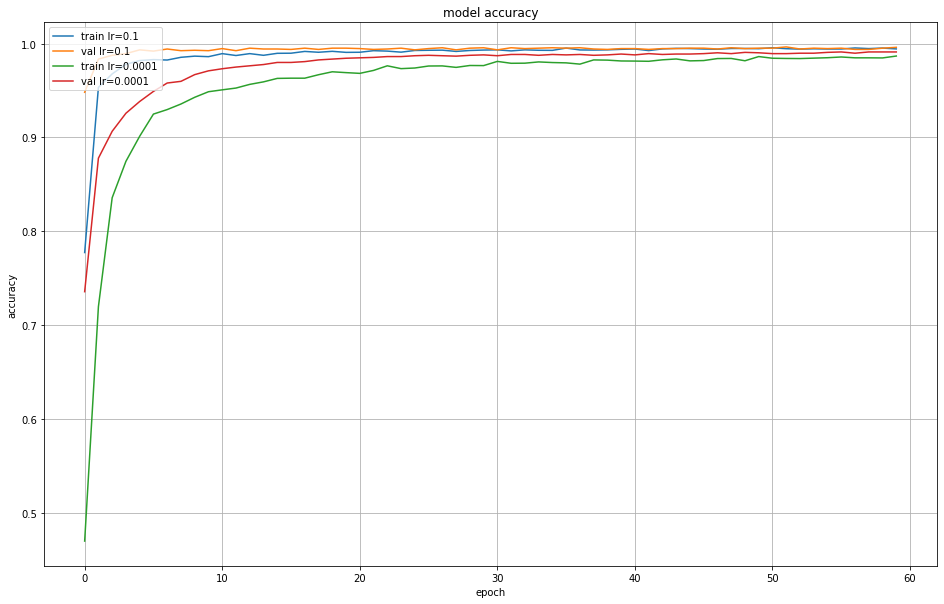

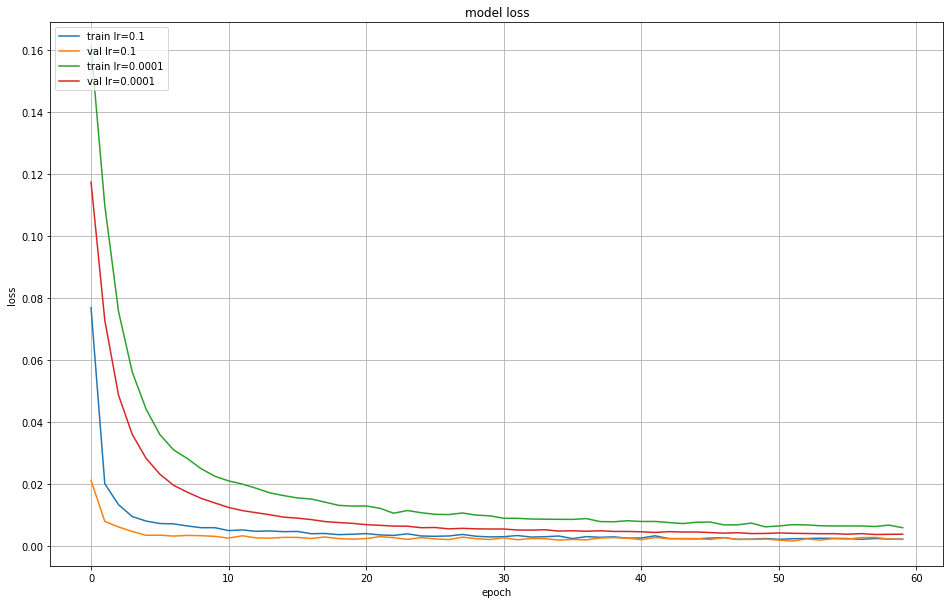

In [50]:
print(hystory.history.keys())

# summarize history for accuracy§
plt.figure(figsize=(16,10))
plt.plot(hystory.history['accuracy'])
plt.plot(hystory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(hystory1lr0001.history['accuracy'])
plt.plot(hystory1lr0001.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train lr=0.1', 'val lr=0.1','train lr=0.0001', 'val lr=0.0001'], loc='upper left')
plt.grid()
plt.show()
plt.show()
# summarize history for loss
plt.figure(figsize=(16,10))
plt.plot(hystory.history['loss'])
plt.plot(hystory.history['val_loss'])
plt.plot(hystory1lr0001.history['loss'])
plt.plot(hystory1lr0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train lr=0.1', 'val lr=0.1','train lr=0.0001', 'val lr=0.0001'], loc='upper left')
plt.grid()
plt.show()

In [51]:
model2lr01 = Sequential()

model2lr01.add(Conv1D(filters=8, kernel_size=5, activation='relu', input_shape=(ecg_mat_train.shape[1],1)))
model2lr01.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model2lr01.add(MaxPooling1D(pool_size=2))
model2lr01.add(Dropout(0.6))

model2lr01.add(Flatten())
model2lr01.add(Dense(10, activation='relu'))
model2lr01.add(Dense(4, activation='softmax'))
model2lr01.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [52]:
model2lr01.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 96, 8)             48        
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 94, 16)            400       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 47, 16)            0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 47, 16)            0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 752)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                7530      
_________________________________________________________________
dense_23 (Dense)             (None, 4)               

In [53]:
num_epochs = 30
n_batch_size = 64
hystoryl2lr01 = model2lr01.fit(ecg_mat_train, label_ecg_train,epochs=num_epochs, 
                    steps_per_epoch=train_steps, validation_data=(ecg_mat_test, label_ecg_test), batch_size=n_batch_size)

Epoch 1/30
140/140 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.8477 - val_loss: 0.0119 - val_accuracy: 0.9732
Epoch 2/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9675 - val_loss: 0.0073 - val_accuracy: 0.9817
Epoch 3/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9773 - val_loss: 0.0055 - val_accuracy: 0.9866
Epoch 4/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9788 - val_loss: 0.0050 - val_accuracy: 0.9870
Epoch 5/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9819 - val_loss: 0.0041 - val_accuracy: 0.9902
Epoch 6/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9844 - val_loss: 0.0046 - val_accuracy: 0.9888
Epoch 7/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9851 - val_loss: 0.0036 - val_accuracy: 0.9924
Epoch 

In [54]:
model2lr0001 = Sequential()

model2lr0001.add(Conv1D(filters=8, kernel_size=5, activation='relu', input_shape=(ecg_mat_train.shape[1],1)))
model2lr0001.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model2lr0001.add(MaxPooling1D(pool_size=2))
model2lr0001.add(Dropout(0.5))

model2lr0001.add(Flatten())
model2lr0001.add(Dense(10, activation='relu'))
model2lr0001.add(Dense(4, activation='softmax'))
optimizer =Adam(learning_rate=0.0001)
model2lr0001.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

In [55]:
num_epochs = 30
n_batch_size = 64
train_steps = int(np.ceil(len(ecg_mat_train)/n_batch_size))
val_steps = int(np.ceil(len(label_ecg_test)/n_batch_size))
hystory2lr0001 = model2lr0001.fit(ecg_mat_train, label_ecg_train,epochs=num_epochs, 
                    steps_per_epoch=train_steps, validation_data=(ecg_mat_test, label_ecg_test), batch_size=n_batch_size)

Epoch 1/30
140/140 [==============================] - 1s 3ms/step - loss: 0.1759 - accuracy: 0.3730 - val_loss: 0.1497 - val_accuracy: 0.6951
Epoch 2/30
140/140 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.7285 - val_loss: 0.0734 - val_accuracy: 0.8632
Epoch 3/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.8726 - val_loss: 0.0373 - val_accuracy: 0.9262
Epoch 4/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9222 - val_loss: 0.0243 - val_accuracy: 0.9468
Epoch 5/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9380 - val_loss: 0.0178 - val_accuracy: 0.9611
Epoch 6/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9516 - val_loss: 0.0142 - val_accuracy: 0.9705
Epoch 7/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9564 - val_loss: 0.0120 - val_accuracy: 0.9750
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


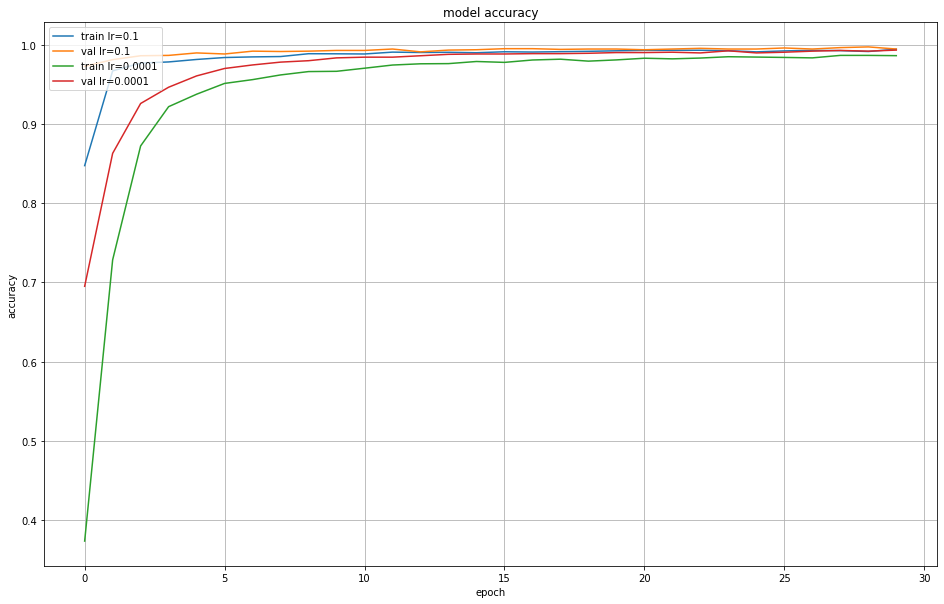

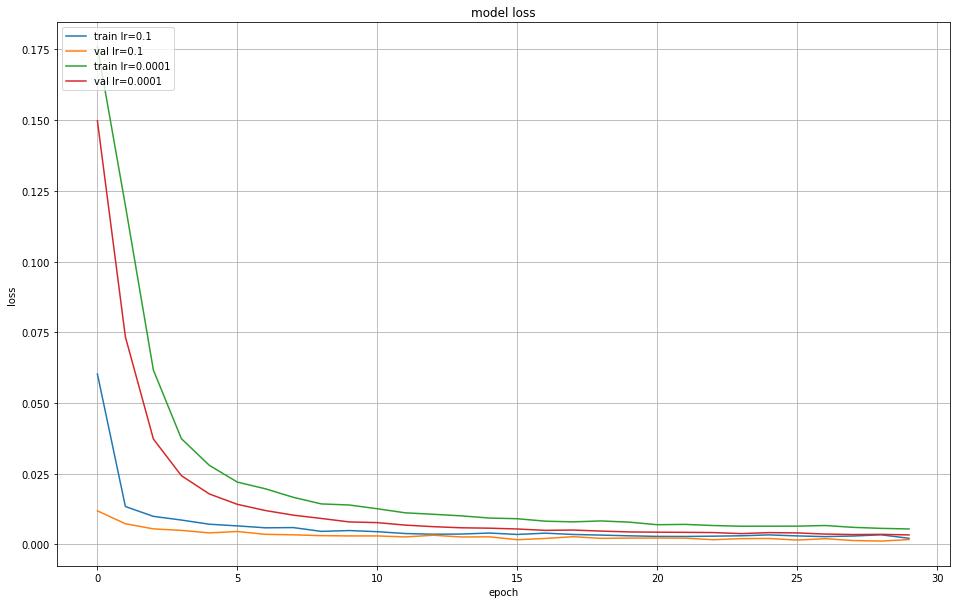

In [56]:
print(hystory.history.keys())

# summarize history for accuracy§
plt.figure(figsize=(16,10))
plt.plot(hystoryl2lr01.history['accuracy'])
plt.plot(hystoryl2lr01.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(hystory2lr0001.history['accuracy'])
plt.plot(hystory2lr0001.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train lr=0.1', 'val lr=0.1','train lr=0.0001', 'val lr=0.0001'], loc='upper left')
plt.grid()
plt.show()
plt.show()
# summarize history for loss
plt.figure(figsize=(16,10))
plt.plot(hystoryl2lr01.history['loss'])
plt.plot(hystoryl2lr01.history['val_loss'])
plt.plot(hystory2lr0001.history['loss'])
plt.plot(hystory2lr0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train lr=0.1', 'val lr=0.1','train lr=0.0001', 'val lr=0.0001'], loc='upper left')
plt.grid()
plt.show()

# NN normale


In [6]:
network_model = tf.keras.Sequential([tf.keras.Input(shape=(100,)),
                                    tf.keras.layers.Dense(70, activation="relu"), 
                                    tf.keras.layers.Dense(50,activation="relu"), 
                                    tf.keras.layers.Dense(30,activation="relu"), 
                                     tf.keras.layers.Dense(4, activation="softmax")])

In [7]:
network_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                7070      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3550      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 124       
Total params: 12,274
Trainable params: 12,274
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 30
batch_size = 64
train_steps = int(np.ceil(len(ecg_mat_train)/batch_size))
val_steps = int(np.ceil(len(label_ecg_test)/batch_size))
network_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = network_model.fit(ecg_mat_train, label_ecg_train,epochs=num_epochs, 
                    steps_per_epoch=train_steps,  
                    validation_steps=val_steps, validation_data=(ecg_mat_test, label_ecg_test), batch_size=15)


Epoch 1/30
140/140 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.9114 - val_loss: 0.0572 - val_accuracy: 0.9886
Epoch 2/30
140/140 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9914 - val_loss: 0.0187 - val_accuracy: 0.9962
Epoch 3/30
140/140 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9919 - val_loss: 0.0108 - val_accuracy: 0.9981
Epoch 4/30
140/140 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9948 - val_loss: 0.0248 - val_accuracy: 0.9924
Epoch 5/30
140/140 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9971 - val_loss: 0.0089 - val_accuracy: 0.9962
Epoch 6/30
140/140 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9957 - val_loss: 0.0082 - val_accuracy: 0.9981
Epoch 7/30
140/140 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


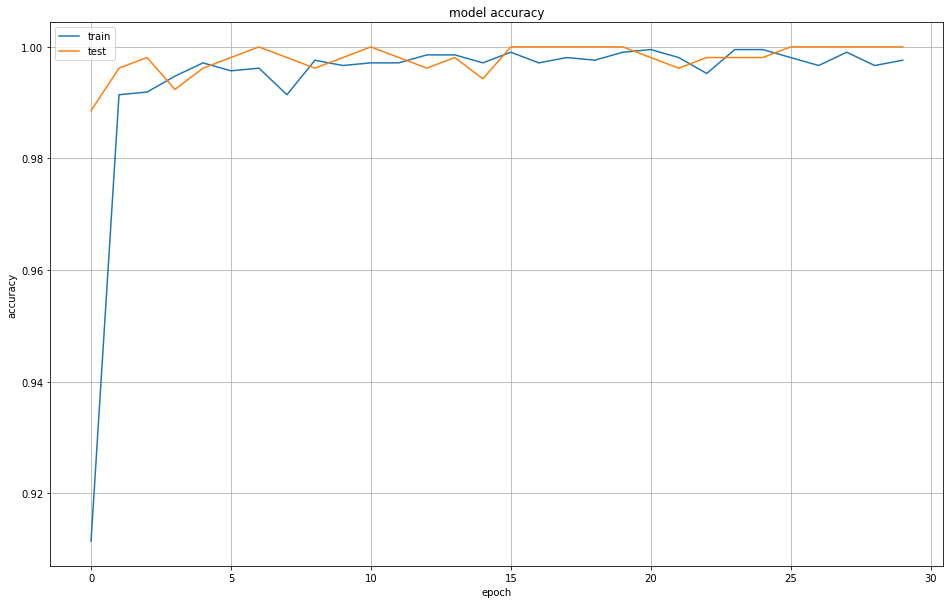

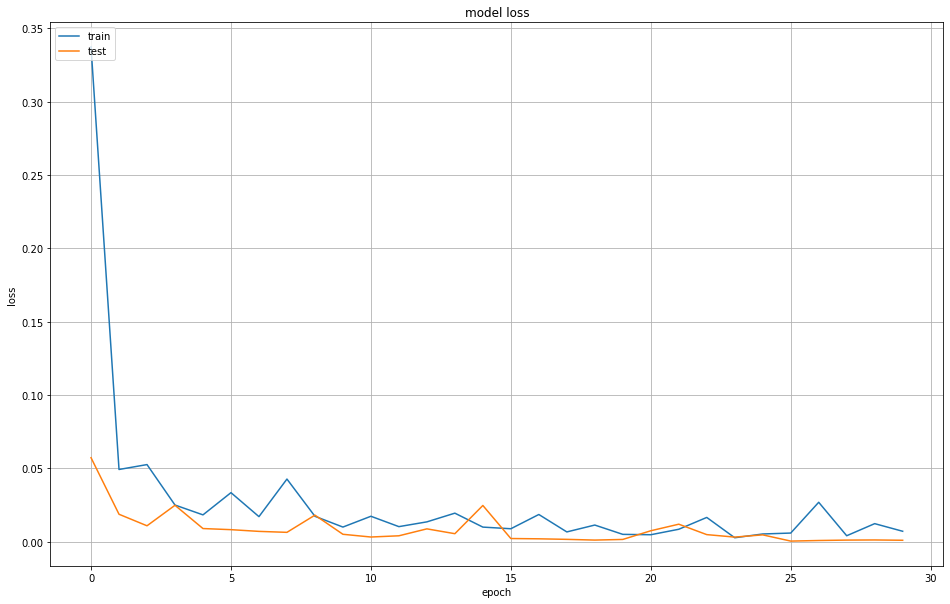

In [9]:
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(16,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.figure(figsize=(16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()